In [1]:
import cv2
import pytesseract as pytesseract
from pytesseract import Output
from easyocr import easyocr
from matplotlib import pyplot as plt
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

/Library/Python/3.9/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/Library/Python/3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


pytesseract


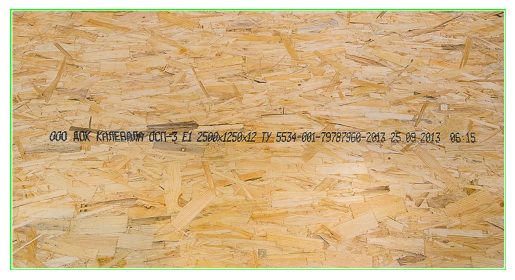

easyocr


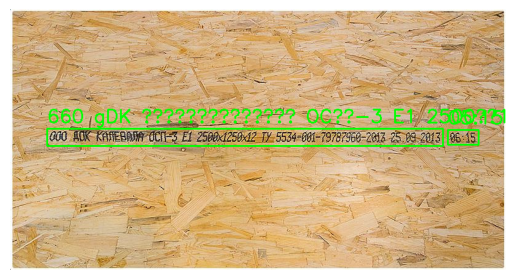

doctr


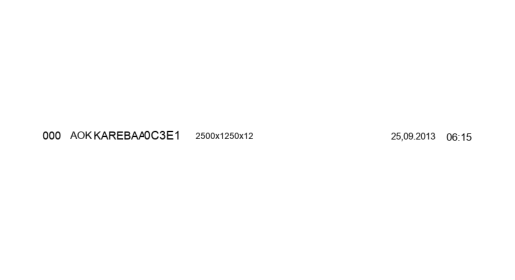

pytesseract


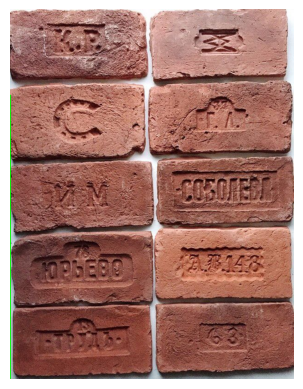

easyocr


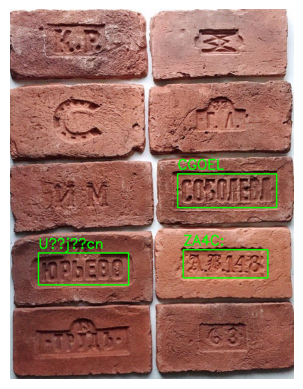

doctr


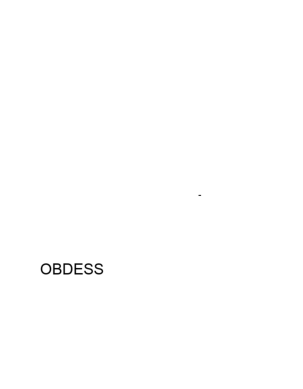

pytesseract


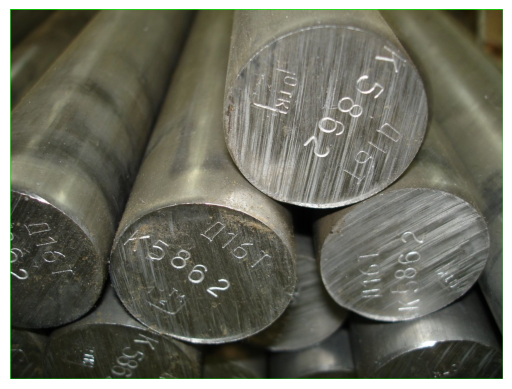

easyocr


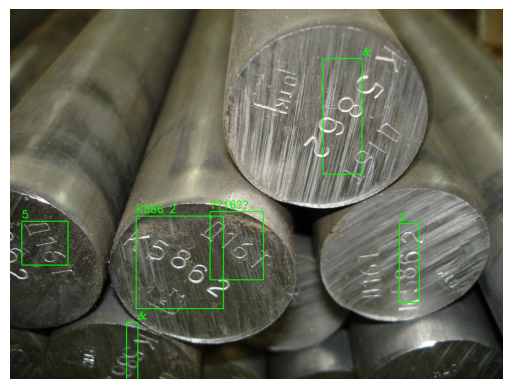

doctr


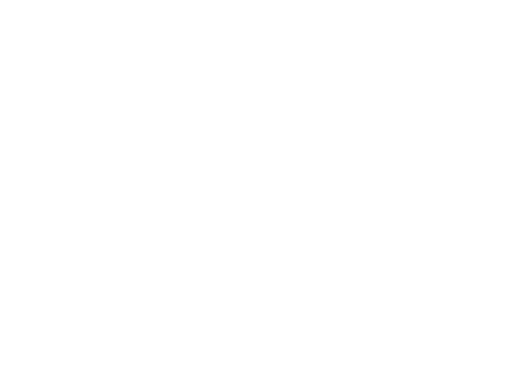

In [17]:
def get_image_with_recognize(images):
    reader = easyocr.Reader(['ru','en'])
    doctr_ocr = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

    for filename in images:

        # pytesseract
        print('pytesseract')
        img_pytesseract = cv2.imread(filename)
        d = pytesseract.image_to_data(img_pytesseract, output_type=Output.DICT)
        n_boxes = len(d['text'])
        for i in range(n_boxes):
            if int(d['conf'][i]) > 60:
                (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
                img_pytesseract = cv2.rectangle(img_pytesseract, (x, y), (x + w, y + h), (0, 255, 0), 2)
                img_pytesseract = cv2.putText(img_pytesseract, d['text'][i], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        plt.imshow(img_pytesseract[:,:,::-1])
        plt.axis('off')
        plt.show()

        # easyocr
        print('easyocr')
        image = cv2.imread(filename)
        results = reader.readtext(image)
        for res in results:
            top_left = (int(res[0][0][0]), int(res[0][0][1]))
            bottom_right = (int(res[0][2][0]), int(res[0][2][1]))
            image = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
            image = cv2.putText(image, res[1], (top_left[0], top_left[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        plt.imshow(image[:,:,::-1])
        plt.axis('off')
        plt.show()

        # doctr
        print('doctr')
        single_img_doc = DocumentFile.from_images(filename)
        result = doctr_ocr(single_img_doc)
        synthetic_pages = result.synthesize()
        plt.imshow(synthetic_pages[0])
        plt.axis('off')
        plt.show()

get_image_with_recognize(['/Users/vryndina/study/d-dataset/wood/wood-16.jpg',
                          '/Users/vryndina/study/d-dataset/brick/brick-22.jpg',
                          '/Users/vryndina/study/d-dataset/metal/metal-15.jpg'])